In [2]:
from gettext import install
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score, silhouette_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.datasets import load_digits, make_blobs, make_moons
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits import mplot3d
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



%matplotlib inline

In [3]:
data=pd.read_csv(
    'credit cards-2022-post.csv',
)
df=data
df_drop= data.loc[:,'BILL_AMT1':'REMAINING_BALANCE6']
df_drop=df_drop.drop(df_drop.columns[[12]], axis=1)
df_drop

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,REMAINING_BALANCE1,REMAINING_BALANCE2,REMAINING_BALANCE3,REMAINING_BALANCE4,REMAINING_BALANCE5,REMAINING_BALANCE6
0,2826,4612,4571,5071,5195,0,2000,200,500,124,0,0,826,4412,4071,4947,5195,0
1,9736,12759,12459,12957,13104,12744,3500,200,1000,500,0,1000,6236,12559,11459,12457,13104,11744
2,40810,42653,42351,43011,43011,28947,2502,1200,860,0,579,0,38308,41453,41491,43011,42432,28947
3,84630,87604,89687,90889,91892,93815,5000,5000,4200,4000,4000,5000,79630,82604,85487,86889,87892,88815
4,233918,235404,236564,241075,146440,132290,8357,10001,10000,10000,5000,20000,225561,225403,226564,231075,141440,112290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,6251,12501,4873,4071,-30,-30,12577,4897,4176,0,0,0,-6326,7604,697,4071,-30,-30
23996,107801,122955,117089,95975,62817,61221,30054,20057,5113,3040,20000,30007,77747,102898,111976,92935,42817,31214
23997,81337,80290,82215,80422,78284,77270,2842,20412,0,3000,3000,3000,78495,59878,82215,77422,75284,74270
23998,5379,2062,10515,4158,7958,-196,2065,10556,4170,7963,196,7083,3314,-8494,6345,-3805,7762,-7279


In [4]:
#Scaling Data
#https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/
scaling = StandardScaler()
scaling.fit(df_drop)
df_scaled = scaling.transform(df_drop)
df_scaled

array([[-0.66109611, -0.62784402, -0.61210731, ..., -0.52368196,
        -0.50064346, -0.56337577],
       [-0.56639068, -0.51295113, -0.49863911, ..., -0.4063366 ,
        -0.36952065, -0.36695108],
       [-0.14050404, -0.09137165, -0.0686453 , ...,  0.07107619,
         0.11670641, -0.0792217 ],
       ...,
       [ 0.41494128,  0.43940332,  0.50479486, ...,  0.60875544,
         0.66135764,  0.67882973],
       [-0.62610581, -0.66380533, -0.52660338, ..., -0.66043383,
        -0.45808533, -0.68512094],
       [ 1.44439346,  1.59703343,  1.83232092, ...,  1.6702231 ,
         1.56752916,  1.22963505]])

In [5]:
#Applying PCA
#Taking no. of Principal Components as 3
#https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/
pca = PCA(n_components = 3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca,columns=['P1','P2','P3'])
df_pca

,P1,P2,P3
0,-2.098892,-0.332516,-0.076863
1,-1.650147,-0.298458,-0.108874
2,-0.213882,-0.537101,-0.109666
3,2.363767,-0.331052,-0.296935
4,8.117194,-0.681423,1.196390
...,...,...,...
23995,-2.071747,0.121385,-0.061382
23996,2.441166,1.160048,1.658384
23997,1.821053,-0.208741,-0.209730
23998,-2.069738,0.295209,0.115205


In [6]:
#https://stackoverflow.com/questions/18380419/normalization-to-bring-in-the-range-of-0-1#:~:text=Use%20the%20following%20method%20to%20normalize%20your%20data,%28data%29%29%20%2F%20%28np.max%20%28data%29%20-%20np.min%20%28data%29%29%20Share
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df_norm = NormalizeData(df_pca)
df_norm


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,P1,P2,P3
0,0.076566,0.035675,0.371407
1,0.090043,0.036034,0.370660
2,0.133176,0.033519,0.370642
3,0.210587,0.035690,0.366272
4,0.383373,0.031999,0.401118
...,...,...,...
23995,0.077381,0.040458,0.371768
23996,0.212912,0.051402,0.411899
23997,0.194289,0.036979,0.368307
23998,0.077441,0.042289,0.375889


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [55.0, 55.0, 74.375, 74.375],
  [45.0, 45.0, 64.6875, 64.6875],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [54.84375, 54.84375, 122.5, 122.5],
  [35.0, 35.0, 88.671875, 88.671875],
  [145.0, 145.0, 155.0, 155.0],
  [61.8359375, 61.8359375, 150.0, 150.0],
  [20.0, 20.0, 105.91796875, 105.91796875],
  [5.0, 5.0, 62.958984375, 62.958984375]],
 'dcoord': [[0.0, 0.17642021570418193, 0.17642021570418193, 0.0],
  [0.0, 0.11800085264971914, 0.11800085264971914, 0.0],
  [0.0, 0.12534236388788075, 0.12534236388788075, 0.11800085264971914],
  [0.0, 0.12866672613520902, 0.12866672613520902, 0.12534236388788075],
  [0.0, 0.13319492963989, 0.13319492963989, 0.12866672613520902],
  [0.0, 0.1388328841942288, 0.1388328841942288, 0.13319492963989],
  [0.0, 0.13915784527862646, 0.13915784527862646, 0.1388328841942288],
  [0.0,

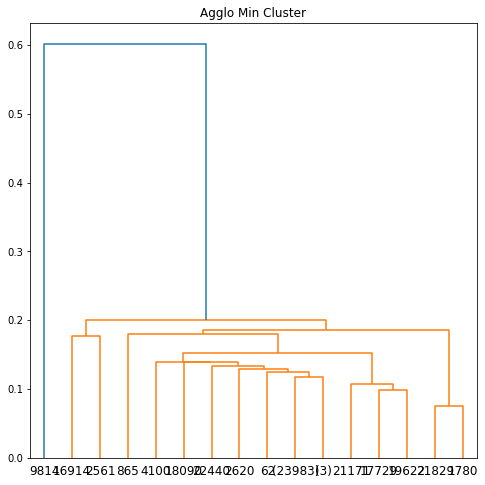

In [6]:
#Use normalized PCA DF
#MIN
#https://machinelearningknowledge.ai/agglomerative-hierarchical-clustering-in-python-sklearn-scipy/#:~:text=Creating%20Dendrogram%20with%20Python%20Scipy%20Python%20Scipy%20has,and%20then%20use%20this%20to%20create%20the%20dendrogram.
#https://stackoverflow.com/questions/66180002/scipy-cluster-hierarchy-dendrogram-exactly-what-does-truncate-mode-level-do

max_d=6
plt.figure(figsize=(8,8))
plt.title('Agglo Min Cluster')

linkage_method = linkage(df_norm, 
                         method='single',
                         metric='euclidean',
                         optimal_ordering=True)

Dendrogram = dendrogram(linkage_method, 
                        truncate_mode='level',
                        p=10,
                        show_leaf_counts=True)

Dendrogram

#.head from dataset.

# y-dist = distance between points
# orange = massive cluster
# blue = outlier

In [ ]:
#Use normalized PCA DF
#MAX
#https://machinelearningknowledge.ai/agglomerative-hierarchical-clustering-in-python-sklearn-scipy/#:~:text=Creating%20Dendrogram%20with%20Python%20Scipy%20Python%20Scipy%20has,and%20then%20use%20this%20to%20create%20the%20dendrogram.
#https://stackoverflow.com/questions/66180002/scipy-cluster-hierarchy-dendrogram-exactly-what-does-truncate-mode-level-do

max_d=6
plt.figure(figsize=(8,8))
plt.title('Agglo Max Cluster')

linkage_method = linkage(df_norm, 
                         method='complete',
                         metric='euclidean',
                         optimal_ordering=True)

Dendrogram = dendrogram(linkage_method, 
                        truncate_mode='level',
                        p=5,
                        show_leaf_counts=True)

Dendrogram



In [ ]:
#Use normalized PCA DF
#WARD
#https://machinelearningknowledge.ai/agglomerative-hierarchical-clustering-in-python-sklearn-scipy/#:~:text=Creating%20Dendrogram%20with%20Python%20Scipy%20Python%20Scipy%20has,and%20then%20use%20this%20to%20create%20the%20dendrogram.
#https://stackoverflow.com/questions/66180002/scipy-cluster-hierarchy-dendrogram-exactly-what-does-truncate-mode-level-do

max_d=6
plt.figure(figsize=(8,8))
plt.title('Agglo Ward Cluster')

linkage_method = linkage(df_norm, 
                         method='ward',
                         metric='euclidean',
                         optimal_ordering=True)

Dendrogram = dendrogram(linkage_method, 
                        truncate_mode='level',
                        p=5,
                        show_leaf_counts=True)

Dendrogram



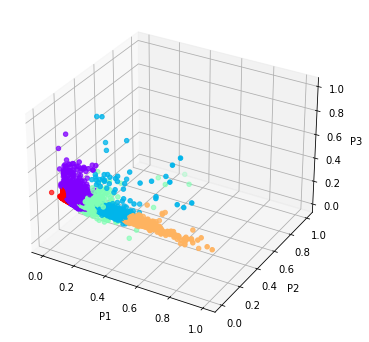

In [7]:
#Ward linkage
ac5 =AgglomerativeClustering(n_clusters = 5, linkage='ward',affinity='euclidean')

plt.figure(figsize =(6, 6))
ax=plt.axes(projection="3d")
ax.scatter3D(df_norm['P1'], df_norm['P2'], df_norm['P3'],c = ac5.fit_predict(df_norm), cmap='rainbow')

#c = ac5.fit_predict(df_norm), cmap ='rainbow', marker='^'

ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()

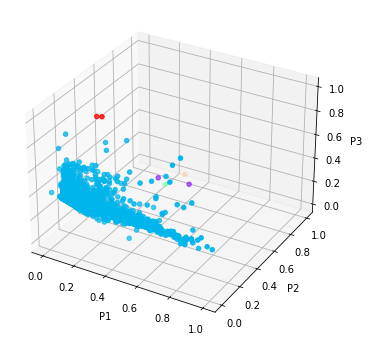

In [8]:
#Min Linkage
ac5 =AgglomerativeClustering(n_clusters = 5, linkage='single',affinity='euclidean')

plt.figure(figsize =(6, 6))
ax=plt.axes(projection="3d")
ax.scatter3D(df_norm['P1'], df_norm['P2'], df_norm['P3'],c = ac5.fit_predict(df_norm), cmap='rainbow')

#c = ac5.fit_predict(df_norm), cmap ='rainbow', marker='^'

ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()

#use different symbols based on age, gender, marriage!!!

#####
#c pulls the dataset

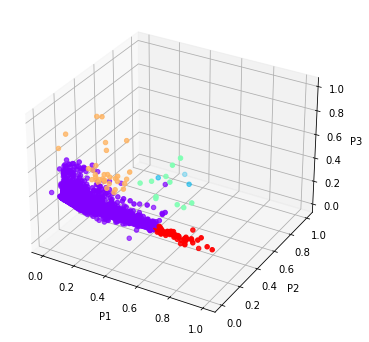

In [9]:
#MAX linkage
ac5 =AgglomerativeClustering(n_clusters = 5, linkage='complete',affinity='euclidean')

plt.figure(figsize =(6, 6))
ax=plt.axes(projection="3d")
ax.scatter3D(df_norm['P1'], df_norm['P2'], df_norm['P3'],c = ac5.fit_predict(df_norm), cmap='rainbow')

ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()

In [10]:
#https://stackoverflow.com/questions/48472156/binarizing-pandas-dataframe-column#:~:text=A%20better%20way%20to%20do%20this%20is%20to,a%20new%20column%20called%20mean_radius%20with%20binarized%20values.
# Part 4
import statsmodels.api as sm

ac5 =AgglomerativeClustering(n_clusters = 5, linkage='single',affinity='euclidean')
c_min = ac5.fit_predict(df_norm)

ac5 =AgglomerativeClustering(n_clusters = 5, linkage='complete',affinity='euclidean')
c_max = ac5.fit_predict(df_norm)

ac5 =AgglomerativeClustering(n_clusters = 5, linkage='ward',affinity='euclidean')
c_ward = ac5.fit_predict(df_norm)

df['c_min']=c_min
df['c_max']=c_max
df['c_ward']=c_ward

for i in range(5):
    df['c_min%s'%i]=c_min
    df['c_max%s'%i]=c_max
    df['c_ward%s'%i]=c_ward
    c_min=globals()['c_min%s' %i] = (df['c_min%s'%i]==i).astype(int)
    c_max=globals()['c_max%s' %i] = (df['c_max%s'%i]==i).astype(int)
    c_ward=globals()['c_ward%s' %i] = (df['c_ward%s'%i]==i).astype(int)

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,c_ward1,c_min2,c_max2,c_ward2,c_min3,c_max3,c_ward3,c_min4,c_max4,c_ward4
0,5771,180000,1,2,1,38,1,2,2,0,...,0,0,1,0,0,0,0,0,0,0
1,3999,20000,2,1,2,23,2,2,2,2,...,0,0,1,0,0,0,0,0,0,0
2,397,100000,1,1,2,38,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,15467,220000,1,1,2,30,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,16482,240000,2,4,1,59,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,20939,280000,1,2,2,39,-2,-2,-2,-2,...,0,0,1,0,0,0,0,0,0,0
23996,4919,260000,2,1,2,39,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23997,1437,80000,2,1,2,29,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
23998,1764,500000,1,1,2,33,-1,-1,-1,-2,...,0,0,1,0,0,0,0,0,0,0


In [11]:
#first 5 points for each and cluster counts
for i in range(5):
    print('ward')
    print(df[df['c_ward']==i][0:5])
    print('\n min')
    df[df['c_min']==i][0:5]
    print('\nmax')
    df[df['c_ward']==i][0:5]
    

    
    
#df[(df.a == k)][0:n]


ward
       ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2     397     100000    1          1         2   38      0      0      0   
5    3051     160000    1          2         2   26      0      0      0   
7   11509     330000    2          2         2   33      1     -2     -2   
9    9579     110000    1          3         1   50      0      0      0   
11  27544      50000    1          3         1   55      0      0      0   

    PAY_4  ...  c_ward1  c_min2  c_max2  c_ward2  c_min3  c_max3  c_ward3  \
2       0  ...        1       0       1        1       0       0        0   
5       0  ...        1       0       1        1       0       0        0   
7      -1  ...        1       0       1        1       0       0        0   
9       0  ...        1       0       1        1       0       0        0   
11      0  ...        1       0       1        1       0       0        0   

    c_min4  c_max4  c_ward4  
2        0       0        0  
5        0     

In [23]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


#Use loop with GINI, Entropy, Purity, on all attributes
def gini_ind(Matches, C_Total):
    return (1-(((Matches/C_Total)**2)+(((Matches-C_Total)/C_Total)**2)))


def entropy(matches, c_tot):
    return -(  (   (matches/c_tot) * math.log((matches/c_tot),2)   )  +  (    ((c_tot-matches)/c_tot) * math.log(((c_tot-matches)/c_tot),2)))
    #-(p(0) * log(P(0)) + p(1) * log(P(1)))


def mismatch(matches, c_tot):
    t=(matches/c_tot)
    f=(c_tot-matches/c_tot)
    if t>f:
        return 1-t
    else:
        return 1-f

#For column 2-10
for (index,colname) in enumerate(df):
    if index>1 and index<10 or index==24:
        
        #define predictor variable
        predictor1 = df[[colname]]

        p1=df[colname]

        #add constant to predictor variables
        predictor1 = sm.add_constant(predictor1)
        
        # Iterate over column names
        for column in df:    
            # Select column contents by column
            # name using [] operator
            columnSeriesObj = df[column]
            print('Column Name: ', column)
            print('Predictor Name: ',colname)
#             print(columnSeriesObj.value_counts())
            #fit linear regression model
            model = sm.OLS(columnSeriesObj, predictor1).fit()
            sse = np.sum((model.fittedvalues - df[column])**2)

            # Purity Score:
            ps=purity_score(df[column], p1)
            gini=(df[column], p1)
            ent=(df[column], p1)
            print("SSE: {} \nPurity Score: {} \n \n\n\n".format(sse, ps))
    else:
        pass

    
    # Include plots Histograms


Column Name:  ID
Predictor Name:  SEX
SSE: 1796256521765.3604 
Purity Score: 8.333333333333333e-05 
 



Column Name:  LIMIT_BAL
Predictor Name:  SEX
SSE: 402861825439780.25 
Purity Score: 0.11216666666666666 
 



Column Name:  SEX
Predictor Name:  SEX
SSE: 2.9937419264557127e-26 
Purity Score: 1.0 
 



Column Name:  EDUCATION
Predictor Name:  SEX
SSE: 14969.687228563222 
Purity Score: 0.468125 
 



Column Name:  MARRIAGE
Predictor Name:  SEX
SSE: 6526.847511298927 
Purity Score: 0.53125 
 



Column Name:  AGE
Predictor Name:  SEX
SSE: 2019948.670599914 
Purity Score: 0.053125 
 



Column Name:  PAY_0
Predictor Name:  SEX
SSE: 30421.296332446982 
Purity Score: 0.490625 
 



Column Name:  PAY_2
Predictor Name:  SEX
SSE: 34202.37596281334 
Purity Score: 0.5235416666666667 
 



Column Name:  PAY_3
Predictor Name:  SEX
SSE: 34195.44893531673 
Purity Score: 0.5244583333333334 
 



Column Name:  PAY_4
Predictor Name:  SEX
SSE: 32581.890390920045 
Purity Score: 0.5485 
 



Column Nam

In [21]:
#Use loop with GINI, Entropy, Purity, on all attributes
def gini_ind(Matches, C_Total):
    return (1-(((Matches/C_Total)**2)+(((Matches-C_Total)/C_Total)**2)))


def entropy(matches, c_tot):
    return -(  (   (matches/c_tot) * math.log((matches/c_tot),2)   )  +  (    ((c_tot-matches)/c_tot) * math.log(((c_tot-matches)/c_tot),2)))
    #-(p(0) * log(P(0)) + p(1) * log(P(1)))


def mismatch(matches, c_tot):
    t=(matches/c_tot)
    f=(c_tot-matches/c_tot)
    if t>f:
        return 1-t
    else:
        return 1-f

print(sum(df['default payment next month'] == df['c_min1'] and df['c_min1'].value_counts()==1))

df['c_min1'].value_counts()
df['default payment next month'].value_counts(sort=False)



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
# min clusters is the best
# min cluster 2
# likely because they are the closest points

#Matches
print(df[(df['default payment next month'] == 1) & (df['c_ward4'] == df['default payment next month'])]['c_min'].count())
print(sum(df['default payment next month'] == df['c_ward0'] ))

0
5643


In [15]:
#Use loop with GINI, Entropy, Purity, on all attributes
def gini_ind(Number, Total):
    return (1-(((Number/Total)**2)+(((Total-Number)/Total)**2)))

gini_ind(df['c_min1'].value_counts(),df['c_min'].value_counts())

0   -2.879280e+08
1    1.666944e-04
2             NaN
3             NaN
4             NaN
dtype: float64

In [16]:
#Repeat with unnormalized

In [17]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


p1=df['default payment next month']
purity_score(df.c_max, p1)

0.9947916666666666

C:\Users\dmoye\AppData\Local\Temp\ipykernel_37620\2293828850.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'AGE Distribution in Credit Cards Clients')

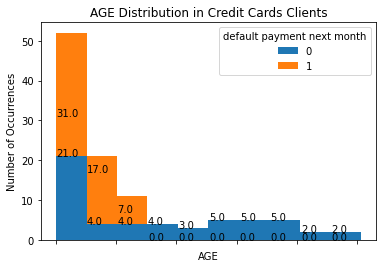

In [18]:
crosstb=pd.crosstab(df['AGE'], df['default payment next month'])
barplot = crosstb.plot.hist(stacked='false',rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("AGE")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("AGE Distribution in Credit Cards Clients")

In [ ]:
# Part D: non normalized PCA on 
#repeat 4,a,b,c

NameError: name 'df' is not defined